In [27]:
%pip install ipdb

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [28]:
%pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [29]:
import os
from argparse import Namespace
import json

import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A

from train import main
from utils import ScaleMinSideToSize, CropCenter, TransformByKeys, TransformByKeysA
from torchvision import transforms # можно использовать albumentations.Compose или torchvision.transforms.Compose

In [30]:
# augmentation_lst = [
#     ('RandomBrightnessContrast', TransformByKeysA(A.RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), brightness_by_max=True), ("image",))),
#     ('RandomGamma', TransformByKeysA(A.RandomGamma(always_apply=False, p=0.5, gamma_limit=(30, 140), eps=1e-07), ("image",)),),
#     ('ToGray', TransformByKeysA(A.ToGray(always_apply=False, p=0.5), ("image",))),
#     ('Blur', TransformByKeysA(A.Blur(always_apply=False, p=0.5, blur_limit=(3, 7)), ("image",))),
#     ('GaussNoise', TransformByKeysA(A.GaussNoise(always_apply=False, p=0.5, var_limit=(50.0, 70.0)), ("image",))),
#     ('CoarseDropout', TransformByKeysA(A.CoarseDropout(always_apply=False, p=0.5, max_holes=1, max_height=50, max_width=50, min_holes=1, min_height=50, min_width=50), ("image",)))
# ]

In [34]:
#!g1.1
   
request = Namespace(
    name='data_vs_epoch_d64000_e1',
    data_folder='data',
    data_size=64_000,
    crop_size=256,
    batch_size=64,
    epochs=1,
    learning_rate=0.001,
    gpu=True,
    worker=1
)

main(request)

Только train_transforms
Reading data...


load landmarks...: 100%|██████████| 64000/64000 [00:31<00:00, 2063.92it/s]

Creating model...



Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/xdg_cache/torch/hub/checkpoints/resnet18-5c106cde.pth


train...:   0%|          | 0/991 [00:00<?, ?it/s]

Tune optimizer...
Ready for training...


prediction...: 100%|██████████| 250/250 [01:59<00:00,  2.09it/s]


Create submission...


In [35]:
#!g1.1

request = Namespace(
    name='data_vs_epoch_d16000_e4',
    data_folder='data',
    data_size=16_000,
    crop_size=256,
    batch_size=64,
    epochs=4,
    learning_rate=0.001,
    gpu=True,
    worker=1
)

main(request)

Только train_transforms
Reading data...


load landmarks...: 100%|██████████| 16000/16000 [00:07<00:00, 2073.31it/s]


Creating model...
Tune optimizer...
Ready for training...


prediction...: 100%|██████████| 250/250 [01:15<00:00,  3.29it/s]


Create submission...


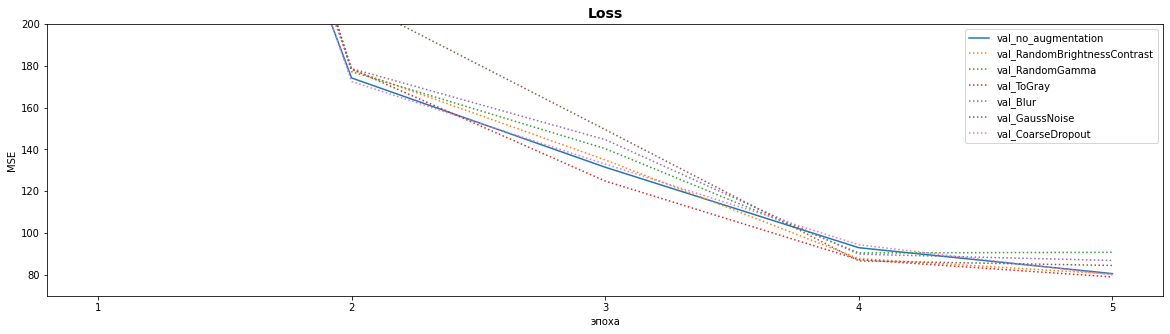

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:816: UserWarning: The following variables cannot be serialized: f
  warnings.warn(message)


In [59]:
# figure
plt.figure(figsize=(20, 5)) 
ax = plt.axes() # Add an axes to the current figure and make it the current axes

for experiment in ['no_augmentation', 'RandomBrightnessContrast', 'RandomGamma', 'ToGray', 'Blur', 'GaussNoise', 'CoarseDropout']:
    
    with open(f'runs/{experiment}/metrics_{experiment}.txt') as f:
        metrics = json.load(f)

    # data
    x = range(1, len(metrics['val_loss']) + 1)
    ls = 'solid' if experiment=='no_augmentation' else 'dotted'
    ax.plot(x, metrics['val_loss'], linestyle=ls, label=f'val_{experiment}')

# annotation    
ax.set_title('Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
ax.legend()
ax.set_xticks(range(1, len(metrics['train_loss']) + 1))
_ = ax.set_ylim([70, 200])